<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Mohamed Ahmed Helmy

GUC-ID: 43-9565

Elective Tutorial No.: T02

**Member 2**

Name: Omar Abdelhamid Ismaeil Youssef Altobgy

GUC-ID: 43-12268

Elective Tutorial No.: T02

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

In [23]:
# return (x_train, y_train), (x_test, y_test)

# reading train images of each class
train_airplane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg').astype('float32').reshape(-1)/255.0 for i in range (0,5000)])
train_automobile = np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg').astype('float32').reshape(-1)/255.0 for i in range (0,5000)])
train_frog = np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg').astype('float32').reshape(-1)/255.0 for i in range (0,5000)])

# images that are not airplane
train_not_airplane = np.vstack([train_automobile, train_frog])
# images that are not automobile
train_not_automobile = np.vstack([train_airplane, train_frog])
# images that are not frog
train_not_frog = np.vstack([train_airplane, train_automobile])

# reading test images of each class
test_airplane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg').astype('float32').reshape(-1)/255.0 for i in range (0,1000)])
test_automobile = np.array([plt.imread('Data/test/automobile/'+str(i)+'.jpg').astype('float32').reshape(-1)/255.0 for i in range (0,1000)])
test_frog = np.array([plt.imread('Data/test/frog/'+str(i)+'.jpg').astype('float32').reshape(-1)/255.0 for i in range (0,1000)])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# converting to gray scale

train_airplane_grayScale = np.zeros((5000, 1024))
train_automobile_grayScale = np.zeros((5000, 1024))
train_frog_grayScale = np.zeros((5000, 1024))

for i in range(0, 5000):
    for j in range(0, 3072, 3):
        r = train_airplane[i,j]
        g = train_airplane[i,j+1]
        b = train_airplane[i,j+2]
        gray = 0.3*r + 0.59*g + 0.11*b
        train_airplane_grayScale[i,j//3] = gray
        
        r = train_automobile[i,j]
        g = train_automobile[i,j+1]
        b = train_automobile[i,j+2]
        gray = 0.3*r + 0.59*g + 0.11*b
        train_automobile_grayScale[i,j//3] = gray

        r = train_frog[i,j]
        g = train_frog[i,j+1]
        b = train_frog[i,j+2]
        gray = 0.3*r + 0.59*g + 0.11*b
        train_frog_grayScale[i,j//3] = gray
        
# images that are not airplane
train_not_airplane_grayScale = np.vstack([train_automobile_grayScale, train_frog_grayScale])
# images that are not automobile
train_not_automobile_grayScale = np.vstack([train_airplane_grayScale, train_frog_grayScale])
# images that are not frog
train_not_frog_grayScale = np.vstack([train_airplane_grayScale, train_automobile_grayScale])

test_airplane_grayScale = np.zeros((1000, 1024))
test_automobile_grayScale = np.zeros((1000, 1024))
test_frog_grayScale = np.zeros((1000, 1024))

for i in range(0, 1000):
    for j in range(0, 3072, 3):
        r = test_airplane[i,j]
        g = test_airplane[i,j+1]
        b = test_airplane[i,j+2]
        gray = 0.3*r + 0.59*g + 0.11*b
        test_airplane_grayScale[i,j//3] = gray
        
        r = test_automobile[i,j]
        g = test_automobile[i,j+1]
        b = test_automobile[i,j+2]
        gray = 0.3*r + 0.59*g + 0.11*b
        test_automobile_grayScale[i,j//3] = gray

        r = test_frog[i,j]
        g = test_frog[i,j+1]
        b = test_frog[i,j+2]
        gray = 0.3*r + 0.59*g + 0.11*b
        test_frog_grayScale[i,j//3] = gray

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [24]:
# Write code here
# Train
# Test
# confusion_matrix = 

# Airplane Classifier

# calculating the mean of airplane images, and first part of SW
m_airplane = np.mean(train_airplane, axis=0)
subtract_airplane = np.subtract(train_airplane, m_airplane)
SW_one_airplane = np.dot(subtract_airplane.T, subtract_airplane)

# calculating the mean of not airplane images, and second part of SW
m_not_airplane = np.mean(train_not_airplane, axis=0)
subtract_not_airplane = np.subtract(train_not_airplane, m_not_airplane)
SW_two_airplane = np.dot(subtract_not_airplane.T, subtract_not_airplane)

# calculating SW of airplane
SW_airplane = SW_one_airplane + SW_two_airplane

# calculating the weight vector for airplane classifier
W_airplane = np.dot(np.linalg.pinv(SW_airplane), np.subtract(m_airplane, m_not_airplane))

# calculating W0 for airplane classifier
W0_airplane = -0.5 * np.dot(W_airplane.T, (m_airplane + m_not_airplane))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Automobile Classifier

# calculating the mean of automobile images, and first part of SW
m_automobile = np.mean(train_automobile, axis=0)
subtract_automobile = np.subtract(train_automobile, m_automobile)
SW_one_automobile = np.dot(subtract_automobile.T, subtract_automobile)

# calculating the mean of not automobile images, and second part of SW
m_not_automobile = np.mean(train_not_automobile, axis=0)
subtract_not_automobile = np.subtract(train_not_automobile, m_not_automobile)
SW_two_automobile = np.dot(subtract_not_automobile.T, subtract_not_automobile)

# calculating SW of automobile
SW_automobile = SW_one_automobile + SW_two_automobile

# calculating the weight vector for automobile classifier
W_automobile = np.dot(np.linalg.pinv(SW_automobile), np.subtract(m_automobile, m_not_automobile))

# calculating W0 for automobile classifier
W0_automobile = -0.5 * np.dot(W_automobile.T, (m_automobile + m_not_automobile))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Frog Classifier

# calculating the mean of frog images, and first part of SW
m_frog = np.mean(train_frog, axis=0)
subtract_frog = np.subtract(train_frog, m_frog)
SW_one_frog = np.dot(subtract_frog.T, subtract_frog)

# calculating the mean of not frog images, and second part of SW
m_not_frog = np.mean(train_not_frog, axis=0)
subtract_not_frog = np.subtract(train_not_frog, m_not_frog)
SW_two_frog = np.dot(subtract_not_frog.T, subtract_not_frog)

# calculating SW of frog
SW_frog = SW_one_frog + SW_two_frog

# calculating the weight vector for frog classifier
W_frog = np.dot(np.linalg.pinv(SW_frog), np.subtract(m_frog, m_not_frog))

# calculating W0 for frog classifier
W0_frog = -0.5 * np.dot(W_frog.T, (m_frog + m_not_frog))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Testing

Y_first1000 = np.zeros((len(test_airplane), 3))
predtiction_first1000 = np.zeros((len(test_airplane), 3), dtype= int)

for i in range(len(test_airplane)):

    Y_first1000[i, 0] = np.dot(W_airplane.T,  test_airplane[i]) + W0_airplane
    Y_first1000[i, 1] = np.dot(W_automobile.T,  test_airplane[i]) + W0_automobile
    Y_first1000[i, 2] = np.dot(W_frog.T,  test_airplane[i]) + W0_frog

    index_max = np.argmax(Y_first1000[i])

    predtiction_first1000[i, index_max] = 1

confusion_one = np.sum(predtiction_first1000, axis=0)


Y_second1000 = np.zeros((len(test_automobile), 3))
predtiction_second1000 = np.zeros((len(test_automobile), 3), dtype= int)

for i in range(len(test_automobile)):

    Y_second1000[i, 0] = np.dot(W_airplane.T,  test_automobile[i]) + W0_airplane
    Y_second1000[i, 1] = np.dot(W_automobile.T,  test_automobile[i]) + W0_automobile
    Y_second1000[i, 2] = np.dot(W_frog.T,  test_automobile[i]) + W0_frog

    index_max = np.argmax(Y_second1000[i])

    predtiction_second1000[i, index_max] = 1

confusion_two = np.sum(predtiction_second1000, axis=0)


Y_third1000 = np.zeros((len(test_frog), 3))
predtiction_third1000 = np.zeros((len(test_frog), 3), dtype= int)

for i in range(len(test_frog)):

    Y_third1000[i, 0] = np.dot(W_airplane.T,  test_frog[i]) + W0_airplane
    Y_third1000[i, 1] = np.dot(W_automobile.T,  test_frog[i]) + W0_automobile
    Y_third1000[i, 2] = np.dot(W_frog.T,  test_frog[i]) + W0_frog

    index_max = np.argmax(Y_third1000[i])

    predtiction_third1000[i, index_max] = 1

confusion_three = np.sum(predtiction_third1000, axis=0)

confusion_matrix = np.vstack([confusion_one, confusion_two, confusion_three])

## Confusion Matrix (Don't Edit)

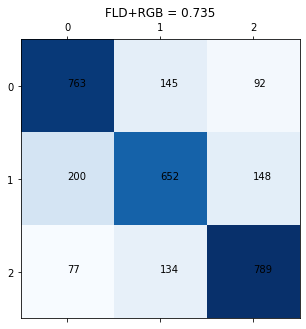

In [25]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/(test_airplane.shape[0]+test_automobile.shape[0]+test_frog.shape[0])
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [26]:
# Write code here
# Train
# Test
# confusion_matrix = 

# GRAY SCALE

# Airplane Classifier

# calculating the mean of airplane images, and first part of SW
m_airplane = np.mean(train_airplane_grayScale, axis=0)
subtract_airplane = np.subtract(train_airplane_grayScale, m_airplane)
SW_one_airplane = np.dot(subtract_airplane.T, subtract_airplane)

# calculating the mean of not airplane images, and second part of SW
m_not_airplane = np.mean(train_not_airplane_grayScale, axis=0)
subtract_not_airplane = np.subtract(train_not_airplane_grayScale, m_not_airplane)
SW_two_airplane = np.dot(subtract_not_airplane.T, subtract_not_airplane)

# calculating SW of airplane
SW_airplane = SW_one_airplane + SW_two_airplane

# calculating the weight vector for airplane classifier
W_airplane = np.dot(np.linalg.pinv(SW_airplane), np.subtract(m_airplane, m_not_airplane))

# calculating W0 for airplane classifier
W0_airplane = -0.5 * np.dot(W_airplane.T, (m_airplane + m_not_airplane))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Automobile Classifier

# calculating the mean of automobile images, and first part of SW
m_automobile = np.mean(train_automobile_grayScale, axis=0)
subtract_automobile = np.subtract(train_automobile_grayScale, m_automobile)
SW_one_automobile = np.dot(subtract_automobile.T, subtract_automobile)

# calculating the mean of not automobile images, and second part of SW
m_not_automobile = np.mean(train_not_automobile_grayScale, axis=0)
subtract_not_automobile = np.subtract(train_not_automobile_grayScale, m_not_automobile)
SW_two_automobile = np.dot(subtract_not_automobile.T, subtract_not_automobile)

# calculating SW of automobile
SW_automobile = SW_one_automobile + SW_two_automobile

# calculating the weight vector for automobile classifier
W_automobile = np.dot(np.linalg.pinv(SW_automobile), np.subtract(m_automobile, m_not_automobile))

# calculating W0 for automobile classifier
W0_automobile = -0.5 * np.dot(W_automobile.T, (m_automobile + m_not_automobile))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Frog Classifier

# calculating the mean of frog images, and first part of SW
m_frog = np.mean(train_frog_grayScale, axis=0)
subtract_frog = np.subtract(train_frog_grayScale, m_frog)
SW_one_frog = np.dot(subtract_frog.T, subtract_frog)

# calculating the mean of not frog images, and second part of SW
m_not_frog = np.mean(train_not_frog_grayScale, axis=0)
subtract_not_frog = np.subtract(train_not_frog_grayScale, m_not_frog)
SW_two_frog = np.dot(subtract_not_frog.T, subtract_not_frog)

# calculating SW of frog
SW_frog = SW_one_frog + SW_two_frog

# calculating the weight vector for frog classifier
W_frog = np.dot(np.linalg.pinv(SW_frog), np.subtract(m_frog, m_not_frog))

# calculating W0 for frog classifier
W0_frog = -0.5 * np.dot(W_frog.T, (m_frog + m_not_frog))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Testing

Y_first1000 = np.zeros((len(test_airplane_grayScale), 3))
predtiction_first1000 = np.zeros((len(test_airplane_grayScale), 3), dtype= int)

for i in range(len(test_airplane_grayScale)):

    Y_first1000[i, 0] = np.dot(W_airplane.T,  test_airplane_grayScale[i]) + W0_airplane
    Y_first1000[i, 1] = np.dot(W_automobile.T,  test_airplane_grayScale[i]) + W0_automobile
    Y_first1000[i, 2] = np.dot(W_frog.T,  test_airplane_grayScale[i]) + W0_frog

    index_max = np.argmax(Y_first1000[i])

    predtiction_first1000[i, index_max] = 1

confusion_one = np.sum(predtiction_first1000, axis=0)


Y_second1000 = np.zeros((len(test_automobile_grayScale), 3))
predtiction_second1000 = np.zeros((len(test_automobile_grayScale), 3), dtype= int)

for i in range(len(test_automobile_grayScale)):

    Y_second1000[i, 0] = np.dot(W_airplane.T,  test_automobile_grayScale[i]) + W0_airplane
    Y_second1000[i, 1] = np.dot(W_automobile.T,  test_automobile_grayScale[i]) + W0_automobile
    Y_second1000[i, 2] = np.dot(W_frog.T,  test_automobile_grayScale[i]) + W0_frog

    index_max = np.argmax(Y_second1000[i])

    predtiction_second1000[i, index_max] = 1

confusion_two = np.sum(predtiction_second1000, axis=0)


Y_third1000 = np.zeros((len(test_frog_grayScale), 3))
predtiction_third1000 = np.zeros((len(test_frog_grayScale), 3), dtype= int)

for i in range(len(test_frog_grayScale)):

    Y_third1000[i, 0] = np.dot(W_airplane.T,  test_frog_grayScale[i]) + W0_airplane
    Y_third1000[i, 1] = np.dot(W_automobile.T,  test_frog_grayScale[i]) + W0_automobile
    Y_third1000[i, 2] = np.dot(W_frog.T,  test_frog_grayScale[i]) + W0_frog

    index_max = np.argmax(Y_third1000[i])

    predtiction_third1000[i, index_max] = 1

confusion_three = np.sum(predtiction_third1000, axis=0)

confusion_matrix = np.vstack([confusion_one, confusion_two, confusion_three])

## Confusion Matrix (Don't Edit)

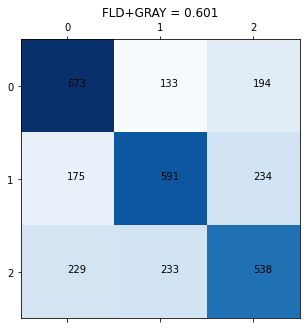

In [27]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/(test_airplane_grayScale.shape[0]+test_automobile_grayScale.shape[0]+test_frog_grayScale.shape[0])
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

-Training on RGB images, gave us heigher accuarcy than training on grayscale images. This is because RGB images have more information than grayscale images. So when we convert RGB images to grayscale, we lose information that make a class distinguishable from the other classes.

-The frog class was affected the most from converting RGB to grayscale. That is due to the domination of shades of green and yellow which can be considered as a distinctive feature for the frog images in RGB and thus, the frog class was the most affected as these features have been lost when the images were converted to grayscale.

...
...
...

##########
<hr style="border:2px solid black"> </hr>